# CIFAR-10 data classification using CNN

## Load CIFAR data from Keras

In [1]:
!pip install keras

    100% |████████████████████████████████| 327kB 2.4MB/s 


In [1]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from keras.datasets import cifar10

Using TensorFlow backend.


In [3]:
(trainImages, trainLabels), (testImages, testLabels) = cifar10.load_data()

170500096/170498071 [==============================] - 22s 0us/step


In [4]:
print(('Training Images', trainImages.shape),('Training Labels',trainLabels.shape))
print(('Test Images', testImages.shape),('Test Labels',testLabels.shape))

('Training Images', (50000, 32, 32, 3)) ('Training Labels', (50000, 1))
('Test Images', (10000, 32, 32, 3)) ('Test Labels', (10000, 1))


In [0]:
def load_labels():
  #execute this command for the path
  #!ls ~/.keras/datasets/cifar-10-batches-py/batches.meta 
  filename = '/content/.keras/datasets/cifar-10-batches-py/batches.meta'
  labelsdict = None
  labels = []
  with open(filename, 'rb') as file:
    labelsdict = pickle.load(file,encoding='bytes')
  labels = [ x.decode('utf-8') for x in labelsdict[b'label_names'] ]
  return labels

In [6]:
labels = load_labels()
print(labels)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


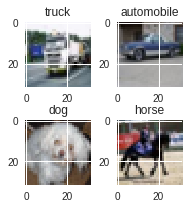

In [7]:
fig = plt.figure(figsize=(3,3))
figrows = 2
figcols = 2
fig.add_subplot(figrows, figcols, 1)
plt.imshow(trainImages[1000])
plt.title(labels[trainLabels[1000][0]])
fig.add_subplot(figrows, figcols, 2)
plt.imshow(trainImages[10000])
plt.title(labels[trainLabels[10000][0]])
fig.add_subplot(figrows, figcols, 3)
plt.imshow(testImages[1000])
plt.title(labels[testLabels[1000][0]])
fig.add_subplot(figrows, figcols, 4)
plt.imshow(testImages[5000])
plt.title(labels[testLabels[5000][0]])
fig.subplots_adjust(hspace=0.5)
plt.show()

## Prepare data for training

In [0]:
from keras.utils import to_categorical

In [0]:
trainImages = trainImages.astype(np.float32) / 255
trainLabels = to_categorical(trainLabels, num_classes=10)
testImages = testImages.astype(np.float32) / 255
testLabels = to_categorical(testLabels, num_classes=10)

In [10]:
print(('Train Images', trainImages.shape), ('Train Labels', trainLabels.shape))
print(('Test Images', testImages.shape), ('Test Labels', testLabels.shape))

('Train Images', (50000, 32, 32, 3)) ('Train Labels', (50000, 10))
('Test Images', (10000, 32, 32, 3)) ('Test Labels', (10000, 10))


## Build model

In [0]:
from keras.layers import Input, ZeroPadding2D
from keras.layers import Conv2D, Activation
from keras.layers import MaxPooling2D, Dropout, BatchNormalization
from keras.layers import Flatten, Dense
from keras.models import Model
import keras.backend as K

In [0]:
K.set_image_data_format('channels_last')

In [0]:
def build_model(input_shape=(32, 32, 3), num_classes=10):
  X = Input(input_shape)
  
  Y = ZeroPadding2D(padding=(3,3))(X)
  
  Y = Conv2D(64, (3,3), padding='same')(Y)
  Y = BatchNormalization(axis=-1)(Y)
  Y = Activation('relu')(Y)
  Y = Conv2D(64, (3,3), padding='valid')(Y)
  Y = BatchNormalization(axis=-1)(Y)
  Y = Activation('relu')(Y)
  Y = MaxPooling2D()(Y)
  
  Y = Dropout(0.1)(Y)
  Y = Conv2D(128, (3,3), padding='same')(Y)
  Y = BatchNormalization(axis=-1)(Y)
  Y = Activation('relu')(Y)
  Y = Conv2D(128, (3,3), padding='valid')(Y)
  Y = BatchNormalization(axis=-1)(Y)
  Y = Activation('relu')(Y)
  Y = MaxPooling2D()(Y)
  
  Y = Dropout(0.25)(Y)
  Y = Conv2D(512, (3,3), padding='same')(Y)
  Y = BatchNormalization(axis=-1)(Y)
  Y = Activation('relu')(Y)
  Y = Conv2D(512, (3,3), padding='valid')(Y)
  Y = BatchNormalization(axis=-1)(Y)
  Y = Activation('relu')(Y)
  Y = MaxPooling2D()(Y)
  
  Y = Dropout(0.25)(Y)
  Y = Flatten()(Y)
  Y = Dense(512)(Y)
  Y = Activation('relu')(Y)
  
  Y = Dropout(0.5)(Y)
  Y = Dense(10)(Y)
  Y = Activation('softmax')(Y)
  
  model = Model(inputs=X, outputs=Y)
  return model
  

Build and compile model

In [0]:
from keras import optimizers, losses

In [0]:
K.clear_session()
model = build_model()

In [0]:
model.compile(optimizer=optimizers.RMSprop(), loss=losses.categorical_crossentropy, metrics=['accuracy'])

In [17]:
history = model.fit(x=trainImages, y=trainLabels, batch_size=64, epochs=25, validation_data=(testImages, testLabels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
43776/50000 [=========================>....] - ETA: 9s - loss: 2.0138 - acc: 0.3451

50000/50000 [==============================] - 82s 2ms/step - loss: 1.9451 - acc: 0.3610 - val_loss: 1.5505 - val_acc: 0.4770
Epoch 2/25
26432/50000 [==============>...............] - ETA: 34s - loss: 1.3365 - acc: 0.5204

50000/50000 [==============================] - 78s 2ms/step - loss: 1.2754 - acc: 0.5456 - val_loss: 1.3268 - val_acc: 0.5713
Epoch 3/25
19840/50000 [==========>...................] - ETA: 44s - loss: 1.1067 - acc: 0.6081

50000/50000 [==============================] - 78s 2ms/step - loss: 1.0528 - acc: 0.6299 - val_loss: 1.1543 - val_acc: 0.5757
Epoch 4/25
17408/50000 [=========>....................] - ETA: 48s - loss: 0.9200 - acc: 0.6782

50000/50000 [==============================] - 78s 2ms/step - loss: 0.8737 - acc: 0.6985 - val_loss: 0.9445 - val_acc: 0.6763
Epoch 5/25
16448/50000 [========>.....................] - ETA: 49s - loss: 0.7463 - acc: 0.7461

50000/50000 [==============================] - 78s 2ms/step - loss: 0.7257 - acc: 0.7561 - val_loss: 0.9129 - val_acc: 0.6876
Epoch 6/25
16064/50000 [========>.....................] - ETA: 50s - loss: 0.6209 - acc: 0.7928

50000/50000 [==============================] - 78s 2ms/step - loss: 0.6209 - acc: 0.7935 - val_loss: 0.8597 - val_acc: 0.7016
Epoch 7/25
15936/50000 [========>.....................] - ETA: 50s - loss: 0.5477 - acc: 0.8157

50000/50000 [==============================] - 78s 2ms/step - loss: 0.5567 - acc: 0.8147 - val_loss: 0.7611 - val_acc: 0.7519
Epoch 8/25
15808/50000 [========>.....................] - ETA: 50s - loss: 0.4994 - acc: 0.8360

50000/50000 [==============================] - 78s 2ms/step - loss: 0.5106 - acc: 0.8349 - val_loss: 0.7634 - val_acc: 0.7473
Epoch 9/25
15872/50000 [========>.....................] - ETA: 50s - loss: 0.4518 - acc: 0.8504

50000/50000 [==============================] - 78s 2ms/step - loss: 0.4717 - acc: 0.8474 - val_loss: 0.7898 - val_acc: 0.7314
Epoch 10/25
15808/50000 [========>.....................] - ETA: 50s - loss: 0.4355 - acc: 0.8580

50000/50000 [==============================] - 78s 2ms/step - loss: 0.4498 - acc: 0.8559 - val_loss: 0.8050 - val_acc: 0.7319
Epoch 11/25
15744/50000 [========>.....................] - ETA: 50s - loss: 0.4120 - acc: 0.8716

50000/50000 [==============================] - 78s 2ms/step - loss: 0.4274 - acc: 0.8651 - val_loss: 0.5853 - val_acc: 0.8102
Epoch 12/25
15744/50000 [========>.....................] - ETA: 50s - loss: 0.4083 - acc: 0.8716

50000/50000 [==============================] - 78s 2ms/step - loss: 0.4207 - acc: 0.8708 - val_loss: 0.5296 - val_acc: 0.8369
Epoch 13/25
15744/50000 [========>.....................] - ETA: 50s - loss: 0.3839 - acc: 0.8783

50000/50000 [==============================] - 78s 2ms/step - loss: 0.4122 - acc: 0.8745 - val_loss: 0.6014 - val_acc: 0.8096
Epoch 14/25
15680/50000 [========>.....................] - ETA: 50s - loss: 0.3979 - acc: 0.8833

50000/50000 [==============================] - 78s 2ms/step - loss: 0.4213 - acc: 0.8763 - val_loss: 0.6061 - val_acc: 0.8139
Epoch 15/25
15744/50000 [========>.....................] - ETA: 50s - loss: 0.3864 - acc: 0.8887

50000/50000 [==============================] - 78s 2ms/step - loss: 0.3992 - acc: 0.8819 - val_loss: 0.6938 - val_acc: 0.7941
Epoch 16/25
15744/50000 [========>.....................] - ETA: 50s - loss: 0.4085 - acc: 0.8870

50000/50000 [==============================] - 78s 2ms/step - loss: 0.4051 - acc: 0.8864 - val_loss: 0.5799 - val_acc: 0.8366
Epoch 17/25
15744/50000 [========>.....................] - ETA: 50s - loss: 0.3654 - acc: 0.8965

50000/50000 [==============================] - 78s 2ms/step - loss: 0.3935 - acc: 0.8867 - val_loss: 0.5611 - val_acc: 0.8302
Epoch 18/25
15616/50000 [========>.....................] - ETA: 50s - loss: 0.3459 - acc: 0.8984

50000/50000 [==============================] - 78s 2ms/step - loss: 0.3839 - acc: 0.8914 - val_loss: 0.8151 - val_acc: 0.7708
Epoch 19/25
15552/50000 [========>.....................] - ETA: 50s - loss: 0.3525 - acc: 0.8979

50000/50000 [==============================] - 78s 2ms/step - loss: 0.3690 - acc: 0.8948 - val_loss: 0.6996 - val_acc: 0.8059
Epoch 20/25
15552/50000 [========>.....................] - ETA: 50s - loss: 0.3831 - acc: 0.8946

50000/50000 [==============================] - 78s 2ms/step - loss: 0.4591 - acc: 0.8913 - val_loss: 0.8170 - val_acc: 0.8189
Epoch 21/25
15616/50000 [========>.....................] - ETA: 50s - loss: 0.6462 - acc: 0.8815

50000/50000 [==============================] - 78s 2ms/step - loss: 0.4617 - acc: 0.8924 - val_loss: 0.7302 - val_acc: 0.8276
Epoch 22/25
15680/50000 [========>.....................] - ETA: 50s - loss: 0.3569 - acc: 0.9063

50000/50000 [==============================] - 78s 2ms/step - loss: 0.3930 - acc: 0.8979 - val_loss: 0.8165 - val_acc: 0.8127
Epoch 23/25
15616/50000 [========>.....................] - ETA: 50s - loss: 0.3331 - acc: 0.9057

50000/50000 [==============================] - 78s 2ms/step - loss: 0.3559 - acc: 0.9030 - val_loss: 0.4979 - val_acc: 0.8418
Epoch 24/25
15552/50000 [========>.....................] - ETA: 51s - loss: 0.3824 - acc: 0.9041

50000/50000 [==============================] - 78s 2ms/step - loss: 0.3951 - acc: 0.9028 - val_loss: 0.5385 - val_acc: 0.8456
Epoch 25/25
15552/50000 [========>.....................] - ETA: 50s - loss: 0.3474 - acc: 0.9045

50000/50000 [==============================] - 78s 2ms/step - loss: 0.3805 - acc: 0.9048 - val_loss: 0.6512 - val_acc: 0.7995


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


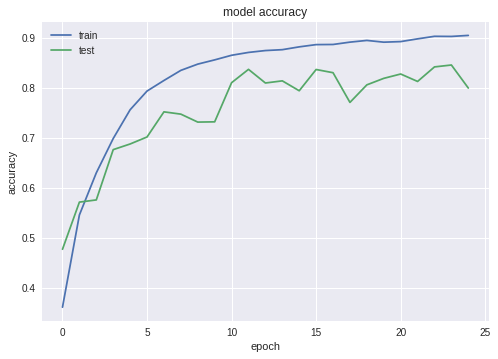

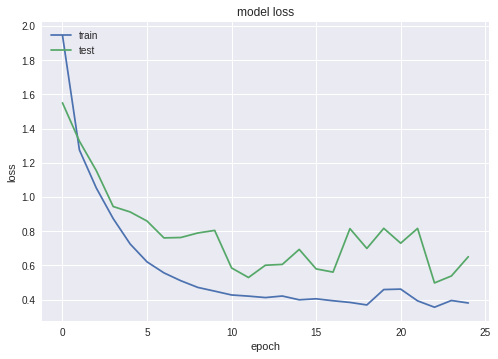

In [18]:
# Plot the graph
print(history.history.keys())
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()